# Lecture 5 Workbook
## The chi squared distribution
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [140]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy.stats import gamma, norm, t, randint, chi2, poisson
import pandas as pd
from IPython.display import HTML


In [111]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [112]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [113]:
cblm_data = pd.read_csv('cerebellar_volumes.csv')


## The distribution of the sample variance

### Show data, sample mean, and model

Text(0.15, 0.7, '$\\bar{x} = 0.13$\n$\\sigma^2 = 0.00012$')

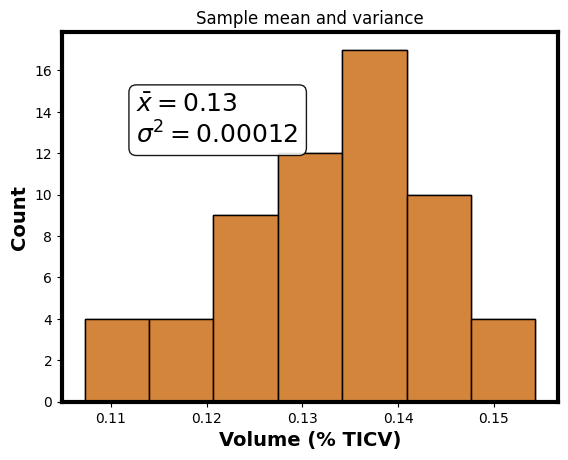

In [114]:
num_cblm = 60
# randomly sample from the loaded data
cblm_sample = cblm_data.TCV_Corr[randint.rvs(low=0, high=len(cblm_data.TCV_Corr), size=num_cblm)]
x_bar = np.mean(cblm_sample)
s2_x = np.var(cblm_sample)
n_sample = len(cblm_sample)

# plot a histogram of the sampled data using seaborn
sns.histplot(cblm_sample, bins='auto')

# get the bin edges from the histogram plot
x_bin_edges = sns.histplot(cblm_sample, bins='auto').get_xticks()

# get the y and x limits of the plot
y_lim = plt.ylim()
x_lim = plt.xlim()

# add plot labels and title
plt.xlabel('Volume (% TICV)')
plt.ylabel('Count')
plt.title('Sample mean and variance')

# add annotations to the plot
plt.annotate(f'$\\bar{{x}} = {x_bar:.2f}$\n$\\sigma^2 = {s2_x:.5f}$', 
             xy=(0.15, 0.70), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='w', alpha=0.9),
             fontsize=18)

### Bootstrap sample the data to get sample variances


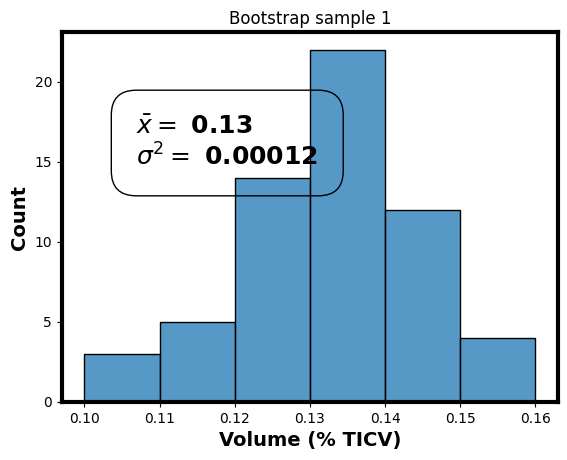

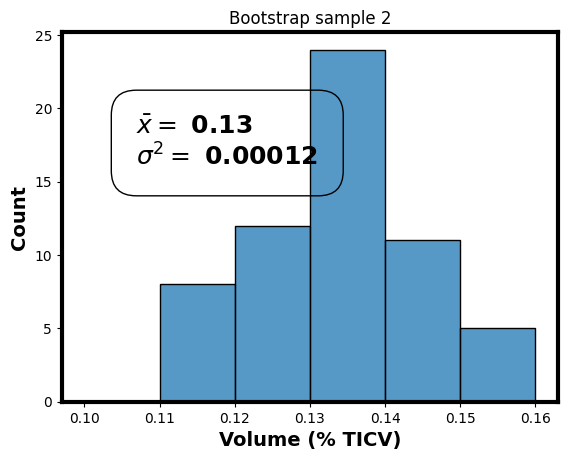

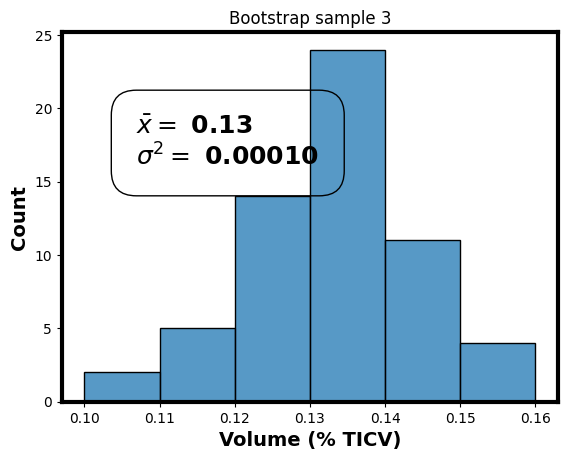

In [115]:
for bootN in range(1, 4):
    boot_indices = np.random.choice(len(cblm_sample), size=n_sample, replace=True)
    bootX = cblm_sample.iloc[boot_indices]

    fig, ax = plt.subplots()
    sns.histplot(bootX, ax=ax, bins=x_bin_edges)
    ax.set(xlabel='Volume (% TICV)', ylabel='Count', 
           title='Sample mean and variance')
    annotation_text = [r'$\bar{x} =$ ' + f'{np.mean(bootX):.2f}',
                       r'$\sigma^2 =$ ' + f'{np.var(bootX):.5f}']
    ax.annotate('\n'.join(annotation_text), xy=(0.15, 0.70), 
                xycoords='axes fraction', fontsize=18, 
                fontweight='bold', color='black', 
                bbox=dict(facecolor='none', edgecolor='black', 
                          boxstyle='round,pad=1'), 
                horizontalalignment='left', verticalalignment='center')
    ax.set_title(f'Bootstrap sample {bootN}')

#### Get a full picture of the distribution

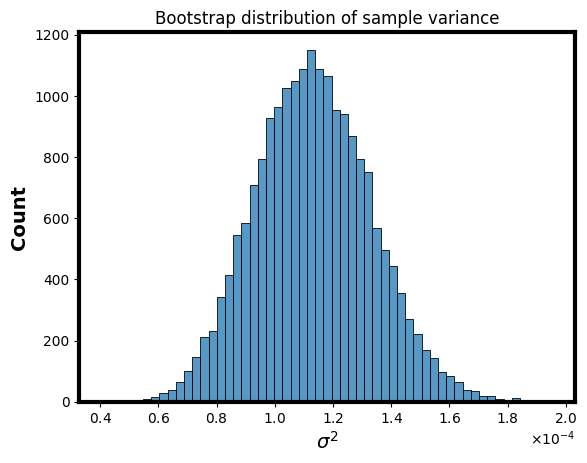

In [116]:
num_boot = 20000
boot_indices = np.random.choice(len(cblm_sample), size=(n_sample, num_boot), replace=True)
bootX = cblm_sample.values[boot_indices]
boot_var = np.var(bootX, axis=0)

def var_distribution_plot():
  plt.figure()
  bins = np.histogram_bin_edges(boot_var, bins='rice')
  var_boot_hist = sns.histplot(boot_var, bins=bins, kde=False)
  var_boot_hist.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
  var_boot_hist.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.xlabel('$\sigma^2$')
  plt.ylabel('Count')
  plt.title('Bootstrap distribution of sample variance')
  return bins

bins = var_distribution_plot()

#### Add a normal model

Mean = 0.00011321468063594034
Std = 2.008891434380289e-05


[Text(0.5, 29.0, '$\\sigma^2$'),
 Text(29.000000000000007, 0.5, 'Count'),
 Text(0.5, 1.0, 'Bootstrap distribution of sample variance with Normal approximation')]

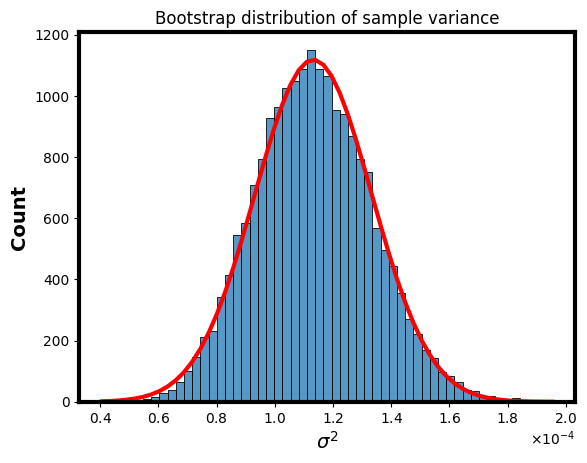

In [117]:
var_mean = np.mean(boot_var)
var_std = np.std(boot_var)
print(f"Mean = {var_mean}")
print(f"Std = {var_std}")

var_normal_model = norm(loc=var_mean, scale=var_std)


var_x = var_distribution_plot()
d_x = var_x[1] - var_x[0]
sns.lineplot(x=var_x, y=var_normal_model.pdf(var_x)*num_boot*d_x, color='red')
ax.set(xlabel=r'$\sigma^2$', ylabel='Count', title='Bootstrap distribution of sample variance with Normal approximation')


### Bootstrapped sample variance for different N

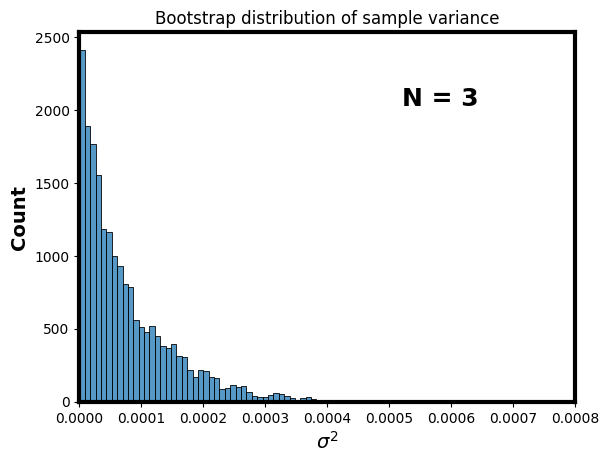

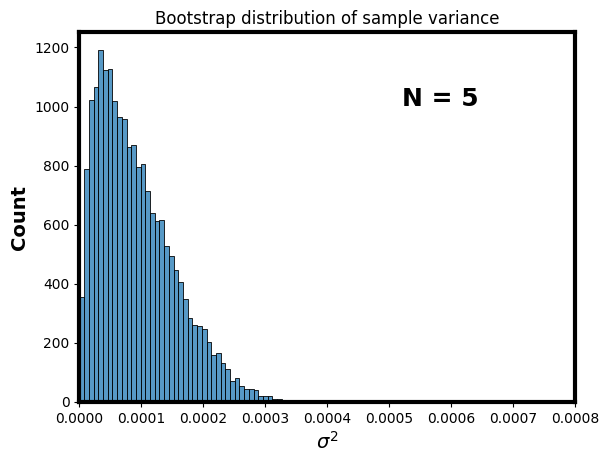

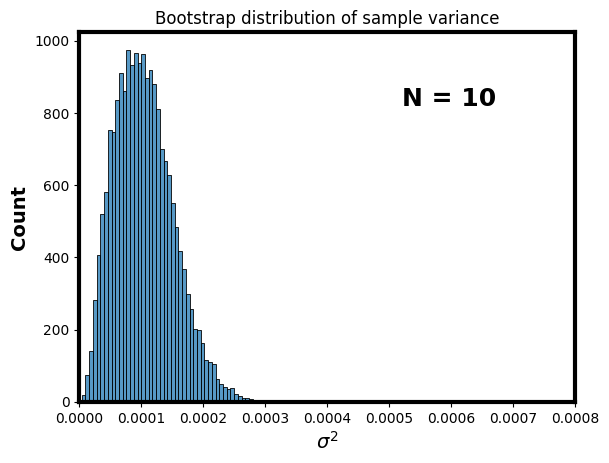

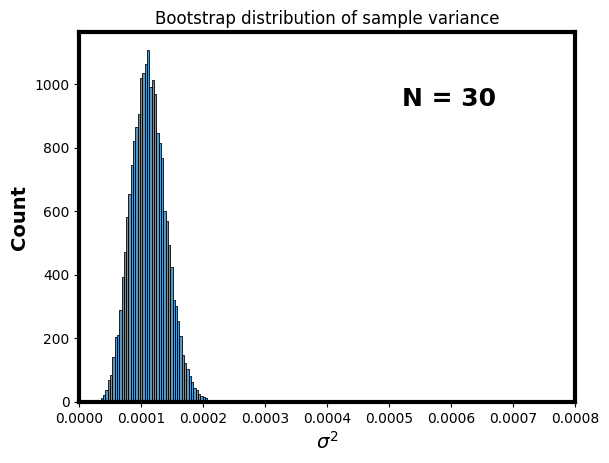

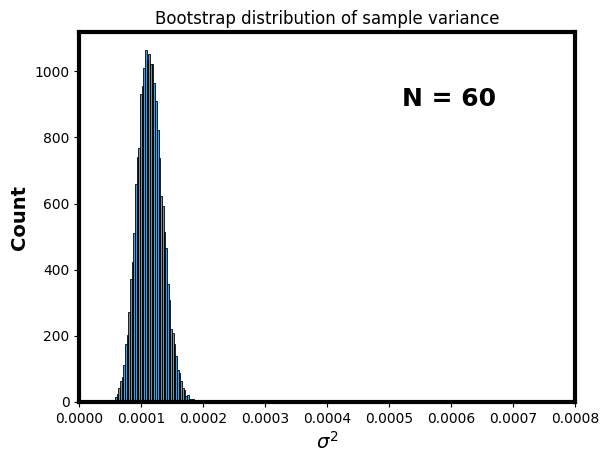

In [118]:
num_boot = 20000
all_n = [3, 5, 10, 30, 60]
num_n = len(all_n)

# Define function to create histogram plot
def create_hist_plot(n):
    boot_x = cblm_sample.values[np.random.randint(n_sample, size=(this_n, num_boot))]
    boot_var = np.var(boot_x, axis=0)

    plt.figure()
    bins = np.histogram_bin_edges(boot_var, bins='rice')
    var_boot_hist = sns.histplot(boot_var, bins=bins, kde=False)
    plt.xlabel('$\sigma^2$')
    plt.ylabel('Count')
    plt.title('Bootstrap distribution of sample variance')
    plt.xlim([0, 8e-4])
    plt.annotate('N = ' + str(n), xy=(0.65, 0.8), xycoords='axes fraction',
                 fontsize=18, fontweight='bold')
    return bins

# Loop over allN and create histogram plot for each N value
for n_num in range(num_n):
    this_n = all_n[n_num]

    create_hist_plot(this_n)


### Chi squared distribution

Nu = 3
Mean = 3.0
S.D. = 2.449489742783178
Nu = 5
Mean = 5.0
S.D. = 3.1622776601683795
Nu = 10
Mean = 10.0
S.D. = 4.47213595499958
Nu = 30
Mean = 30.0
S.D. = 7.745966692414834
Nu = 60
Mean = 60.0
S.D. = 10.954451150103322


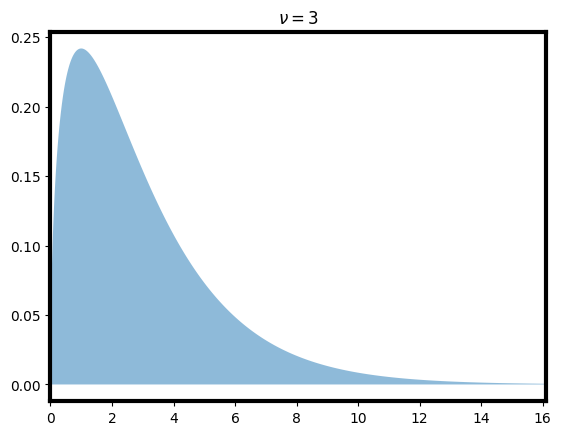

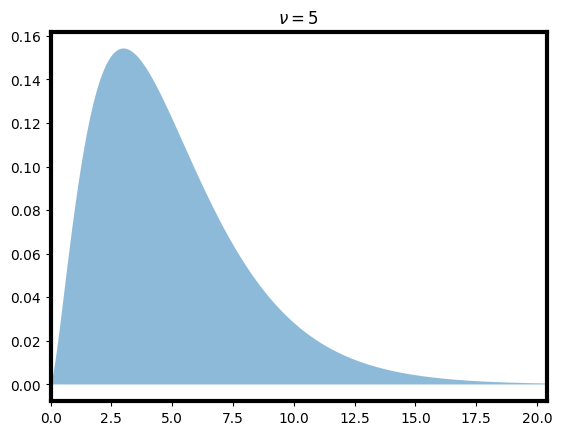

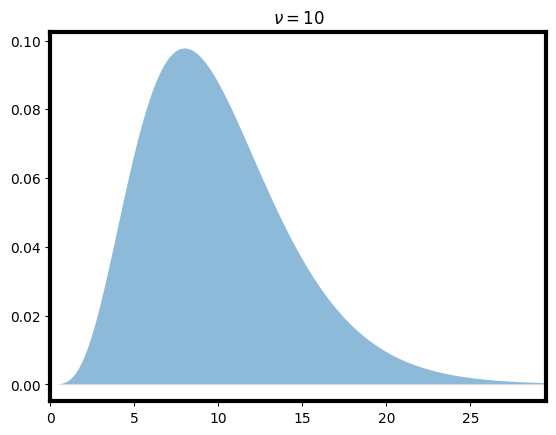

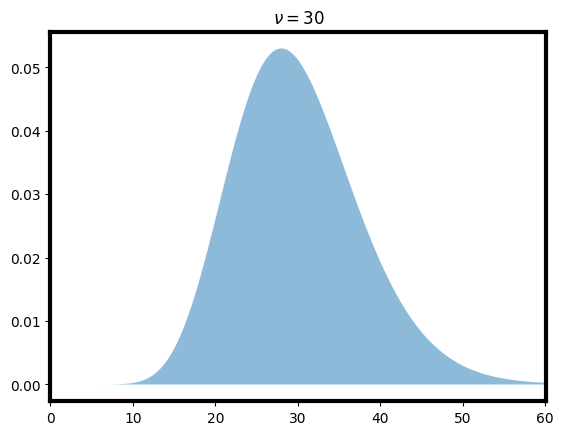

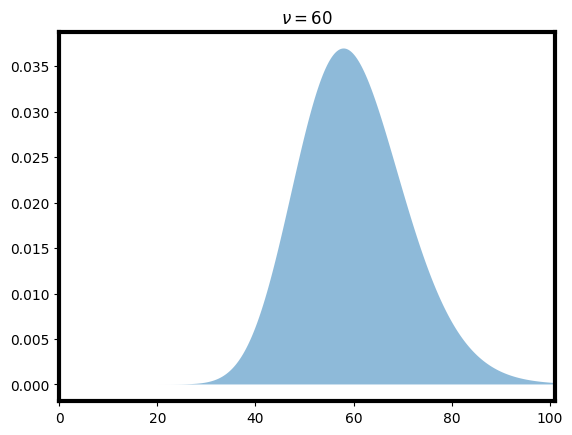

In [119]:
all_nu = all_n
num_nu = len(all_nu)

for nu_num in range(num_nu):
    nu = all_nu[nu_num]
    x_vals = np.arange(0, 400.01, 0.01)
    chi2_pdf = chi2.pdf(x_vals, nu)
    max_x = x_vals[np.where(chi2_pdf > 0.001)[0][-1]]

    fig, ax = plt.subplots()
    ax.fill_between(x_vals, chi2_pdf, alpha=0.5)
    ax.set_xlim([0, max_x * 1.1])
    ax.set_title(f"$\\nu = {nu}$")

    chi2_mean, chi2_var = chi2.stats(nu, moments="mv")
    print(f"Nu = {nu}")
    print(f"Mean = {chi2_mean}")
    print(f"S.D. = {np.sqrt(chi2_var)}")


#### Now superimpose the chi squared onto the bootstrapped histogram

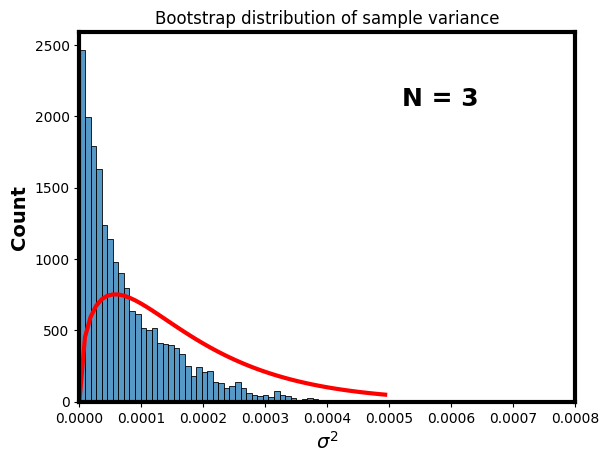

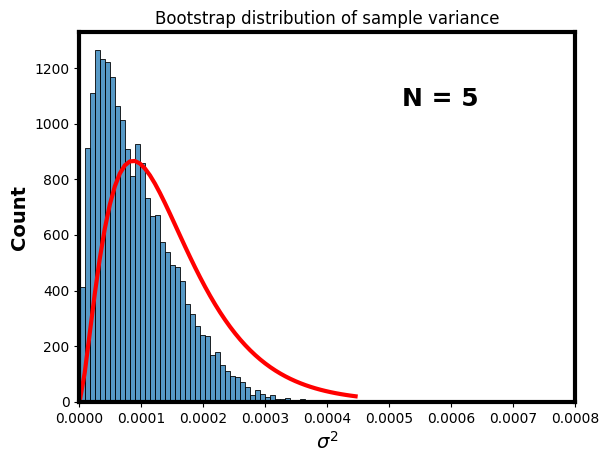

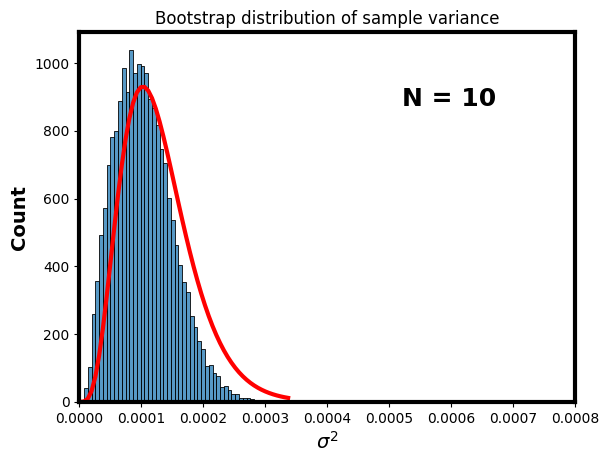

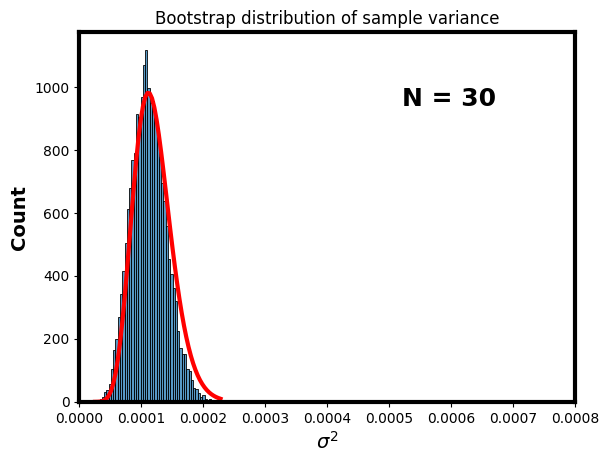

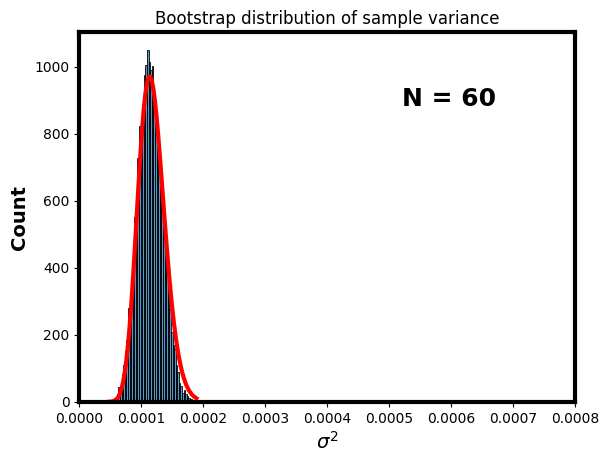

In [120]:
for this_n in all_n:    
    hist_x = create_hist_plot(this_n)

    hist_n = num_boot
    d_x = hist_x[1] - hist_x[0]
    
    # Calculate correction factor based on variance
    s2 = np.var(cblm_sample)
    correction_factor = s2 / (this_n - 1)
    
    # Correct the histogram data
    corrected_x = hist_x / correction_factor
    corrected_d_x = d_x / correction_factor
    
    # Plot the chi-squared distribution on top of the histogram
    plt.plot(hist_x, chi2.pdf(corrected_x, this_n) * hist_n * corrected_d_x, color='r')
    


#### Corrected fit to bootstrap

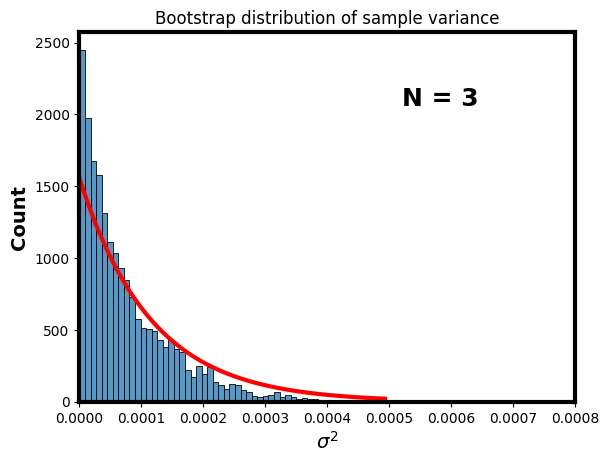

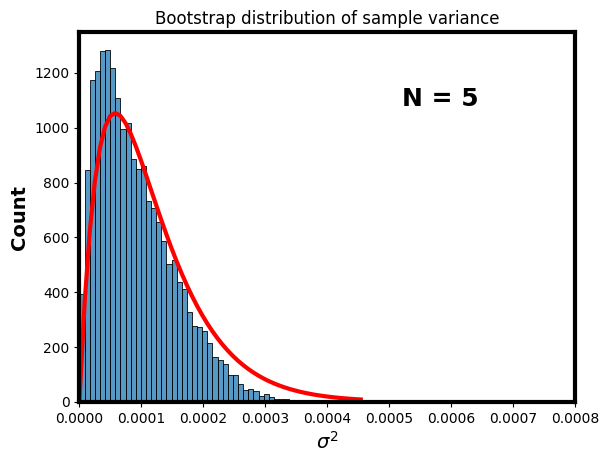

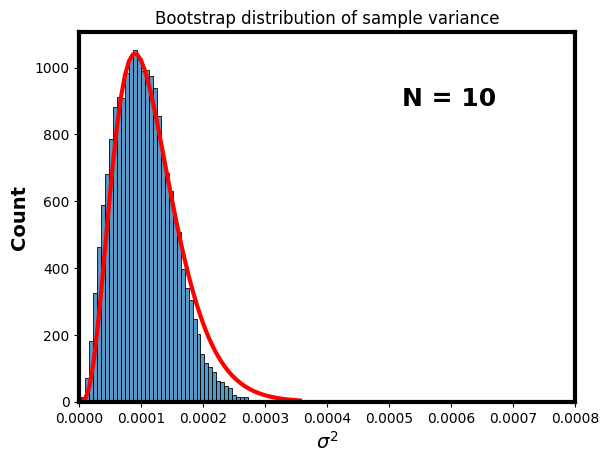

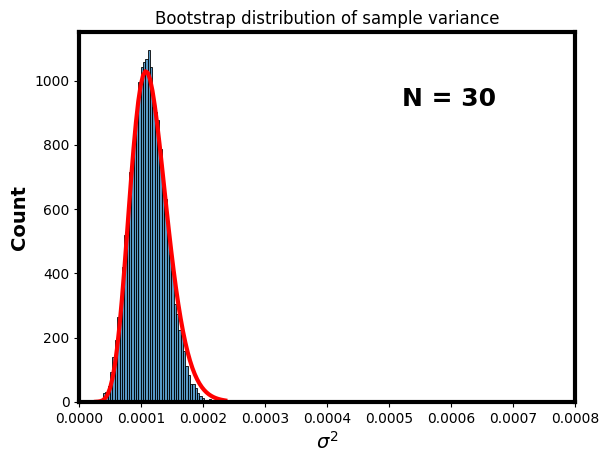

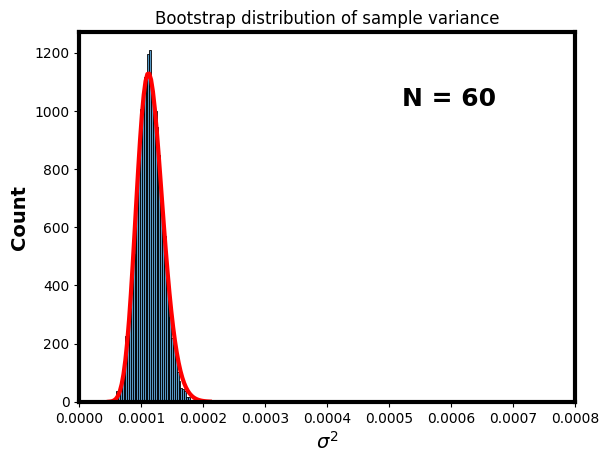

In [121]:
for this_n in all_n:    
    hist_x = create_hist_plot(this_n)

    hist_n = num_boot
    d_x = hist_x[1] - hist_x[0]
    
    # Calculate correction factor based on variance
    s2 = np.var(cblm_sample)
    correction_factor = s2 / (this_n - 1)
    
    # Correct the histogram data
    corrected_x = hist_x / correction_factor
    corrected_d_x = d_x / correction_factor
    
    # Plot the chi-squared distribution on top of the histogram
    plt.plot(hist_x, chi2.pdf(corrected_x, this_n-1) * hist_n * corrected_d_x, color='r')
    


## Comparing the variance of two groups

### Generate a sample of old and young cerebella

Text(0.2, 0.6, '$\\sigma_{old} = 0.009416828922933903$\n$\\sigma_{young} = 0.008173637661610736$')

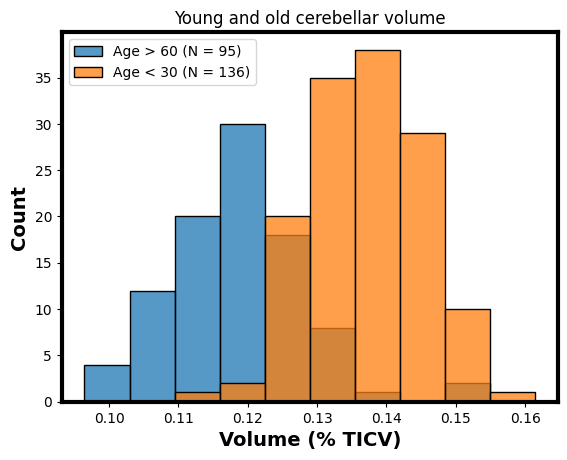

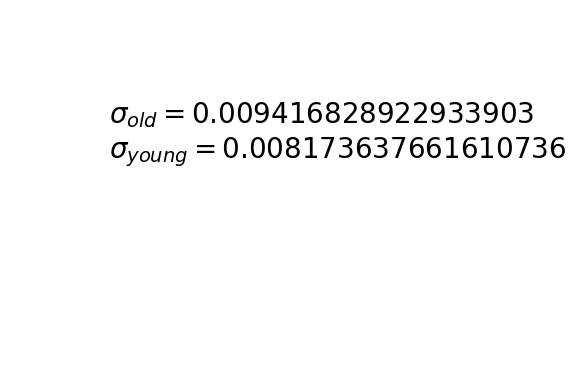

In [124]:
ages = cblm_data['Age']
old_cerebellum_sample = cblm_data.loc[ages > 60, 'TCV_Corr']
young_cerebellum_sample = cblm_data.loc[ages < 30, 'TCV_Corr']
n_old = len(old_cerebellum_sample)
n_young = len(young_cerebellum_sample)

# Plot histograms
bins = np.histogram_bin_edges(pd.concat([old_cerebellum_sample, young_cerebellum_sample]))
sns.histplot(old_cerebellum_sample, bins=bins, label=f'Age > 60 (N = {n_old})')
sns.histplot(young_cerebellum_sample, bins=bins, label=f'Age < 30 (N = {n_young})')
plt.xlabel('Volume (% TICV)')
plt.ylabel('Count')
plt.title('Young and old cerebellar volume')
plt.legend()

# Calculate standard deviations and add text to figure
std_old = np.std(old_cerebellum_sample)
std_young = np.std(young_cerebellum_sample)
plt.figure()
plt.axis('off')
plt.text(0.2, 0.6, r'$\sigma_{old} = ' + str(std_old) + '$\n$\sigma_{young} = ' + str(std_young) + '$', fontsize=20, fontweight='bold', ha='left')

### Compare chi square distributions for two variances

Text(0.2, 0.2, '$F = 1.327$')

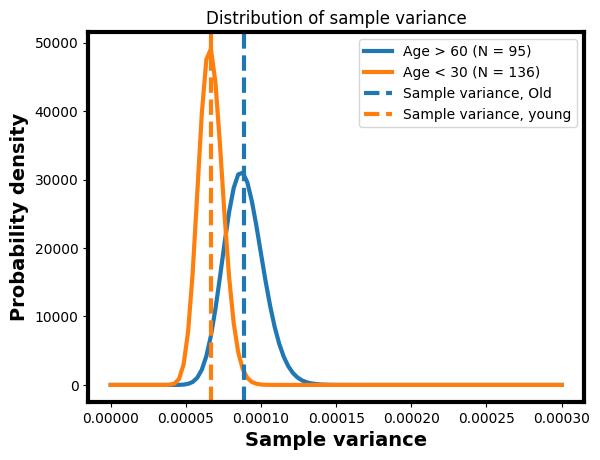

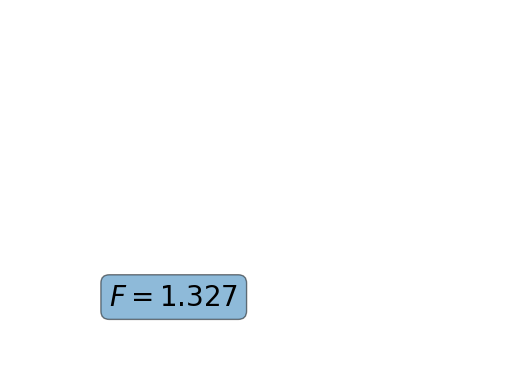

In [127]:
var_x = np.linspace(0, 3*0.01**2, 100)

fig, ax = plt.subplots()
h_old = ax.plot(var_x, chi2.pdf((var_x*(n_old-1))/(std_old**2), n_old-1)*(n_old-1)/(std_old**2), label='Age > 60 (N = {0})'.format(n_old))
h_young = ax.plot(var_x, chi2.pdf((var_x*(n_young-1))/(std_young**2), n_young-1)*(n_young-1)/(std_young**2), label='Age < 30 (N = {0})'.format(n_young))
ax.axvline(x=std_old**2, linestyle='--', color=h_old[0].get_color(), label='Sample variance, Old')
ax.axvline(x=std_young**2, linestyle='--', color=h_young[0].get_color(), label='Sample variance, young')
ax.set_ylabel('Probability density')
ax.set_xlabel('Sample variance')
ax.set_title('Distribution of sample variance')
ax.legend()

F = std_old**2 / std_young**2
fig2, ax2 = plt.subplots()
ax2.axis('off')
ax2.text(0.2, 0.2, f'$F = {F:.3f}$', fontsize=20, fontweight='bold', bbox=dict(boxstyle="round", alpha=0.5))

## Categorical data

### Show education as a categorical variable

Text(0.5, 1.0, 'Distribution of education levels')

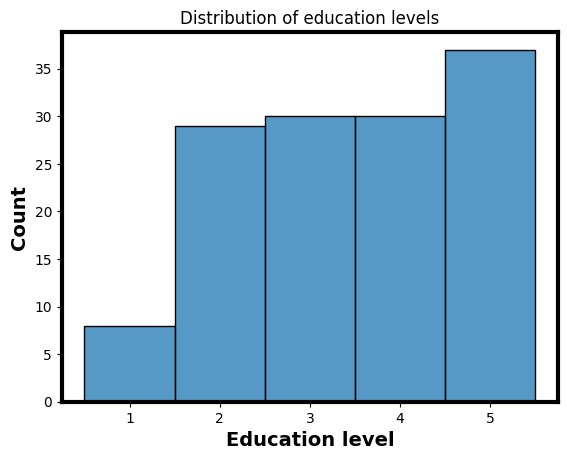

In [137]:
educ = cblm_data["Educ"].astype("category")
sns.histplot(educ)
plt.xlabel('Education level')
plt.title('Distribution of education levels')

#### With a line for expected counts

Chi Squared: 18.01492537313433
Total data: 134
Num levels: 5


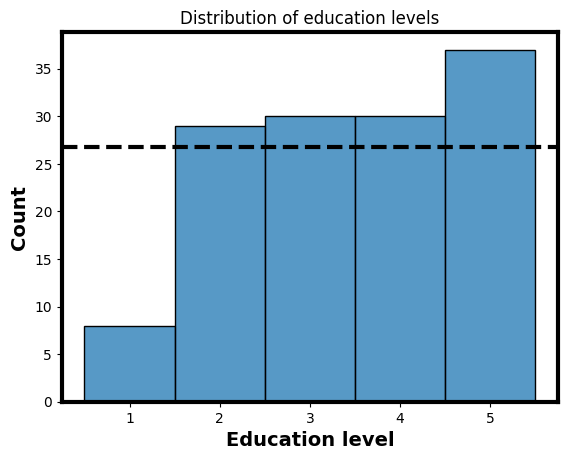

In [152]:
ax = sns.histplot(educ)

counts = educ.value_counts()
total_counts = counts.sum()
num_levels = educ.nunique()
expected = total_counts / num_levels
ax.axhline(y=expected, color='black', linestyle='--')

plt.xlabel('Education level')
plt.title('Distribution of education levels')

chi_sq = np.sum((counts - expected)**2 / expected)
print(f'Chi Squared: {chi_sq}')
print(f'Total data: {total_counts}')
print(f'Num levels: {num_levels}')

### Poisson distribution for counts

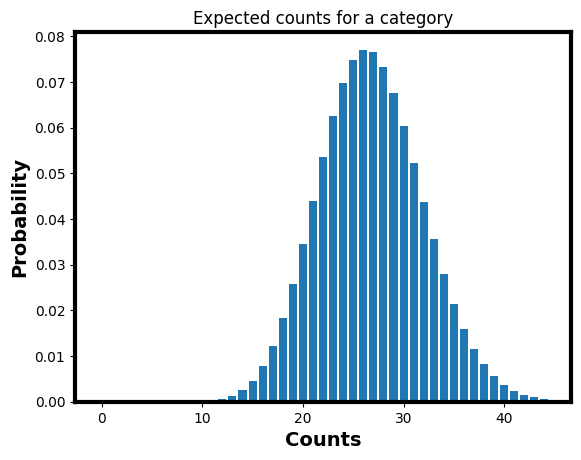

In [146]:
# Create Poisson distribution object with lambda parameter set to expected count
p_dist = poisson(mu=expected)

# Determine the maximum expected count based on 99.9th percentile of the distribution
max_expected_count = p_dist.ppf(0.999)

# Create an array of counts from minimum expected count to maximum expected count
counts = np.arange(0, max_expected_count + 1)

# Calculate the probability density function for each count value
pdf_vals = p_dist.pmf(counts)

# Create bar plot of count values and corresponding probabilities
plt.figure()
plt.bar(counts, pdf_vals)
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.title('Expected counts for a category')
plt.show()

#### Add a normal fit to the Poisson distribution

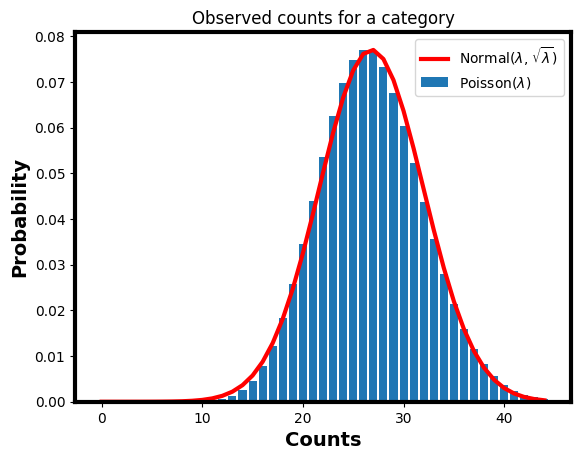

In [147]:
plt.figure()
plt.bar(counts, pdf_vals, label='Poisson($\lambda$)')

n_dist = norm(loc=expected, scale=np.sqrt(expected))
plt.plot(counts, n_dist.pdf(counts), label='Normal($\lambda$, $\sqrt{\lambda}$)', color='r')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.title('Observed counts for a category')
plt.legend()

### Calculate effect size and magnitude

Text(0.1, 0.8, "Cramer's V = 0.183\nAcceptance region = 9.488\np = 0.001")

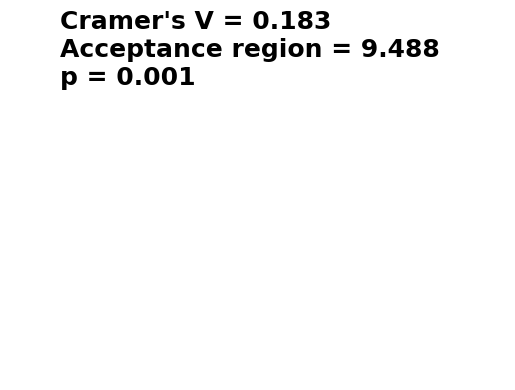

In [150]:
cramer_v = np.sqrt(chi_sq / (total_counts * (num_levels-1)))

sig_thresh = chi2.ppf(0.95, num_levels-1)
p = 1 - chi2.cdf(chi_sq, num_levels-1)

fig, ax = plt.subplots()
ax.axis('off')
ax.text(0.1, 0.8, f"Cramer's V = {cramer_v:.3f}\n"
                    f"Acceptance region = {sig_thresh:.3f}\n"
                    f"p = {p:.3f}", 
        fontweight='bold', fontsize=18)